In [23]:
### Function Imports
from OptionsFunctions import import_fx_data, plot_forex, daily_returns
import numpy as np
from scipy.stats import norm


In [24]:
### Call Function to Load in Rate Data (Get Spot Price S_0)
all_forex_pairs = [
        'EURUSD=X', 'GBPUSD=X', 'USDJPY=X', 'USDCHF=X', 'AUDUSD=X', 'NZDUSD=X',
        'USDCAD=X', 'EURGBP=X', 'EURJPY=X', 'EURCHF=X', 'EURAUD=X', 'EURNZD=X',
        'EURCAD=X', 'GBPAUD=X', 'GBPJPY=X', 'GBPCHF=X', 'AUDJPY=X', 'AUDCHF=X',
        'AUDNZD=X', 'NZDJPY=X', 'NZDCHF=X', 'CADJPY=X', 'CADCHF=X', 'CHFJPY=X'
    ]
pair = ['USDEUR=X']
start_date = '2019-01-01'
forex_data = import_fx_data(pair, start_date)
# Get the Spot Price (Most recent FX rate value)
S_0 = forex_data[pair].iloc[-1]
print('The Spot Price is:', round(S_0, 4))


[*********************100%%**********************]  1 of 1 completed

The Spot Price is: USDEUR=X    0.9332
Name: 1432, dtype: float64


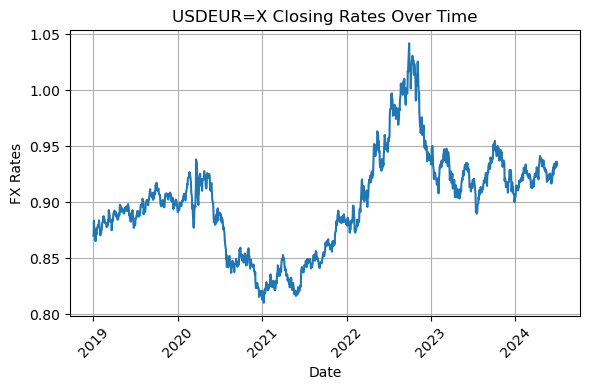

In [25]:
### Call Function to Plot FX Data
plot_forex(forex_data, pair)

In [26]:
### Function Call to Compute Daily Returns
daily_rets = daily_returns(forex_data)
print(daily_rets)

           Date  USDEUR=X
0    2019-01-02  0.002735
1    2019-01-03  0.012688
2    2019-01-04 -0.006406
3    2019-01-07 -0.001697
4    2019-01-08 -0.006036
...         ...       ...
1427 2024-06-24  0.001745
1428 2024-06-25 -0.004190
1429 2024-06-26  0.002157
1430 2024-06-27  0.002763
1431 2024-06-28 -0.003332

[1432 rows x 2 columns]


In [27]:
### Function to Compute Sigma
def compute_sigma(returns):
    # Compute the standard deviation of returns
    sigma = np.std(returns) / 100
    return sigma

sigma = compute_sigma(daily_rets)
print(sigma)

Date        5 days 18:56:03.690095269
USDEUR=X                     0.000045
dtype: object


In [28]:
### Function to Build Black Scholes (BSM) Model
### Function to Build Black Scholes (BSM) Model
def black_scholes(option_type, S_0, K, r, r_f, gamma, T, sigma):
    # Compute d_1 and d_2
    d_1 = (np.log(S_0 / K) + (r - gamma + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d_2 = d_1 - sigma * np.sqrt(T)
    
    # Compute Option Premium and Greeks
    if option_type == 'call':
        option_price = S_0 * np.exp(-gamma * T) * norm.cdf(d_1) - K * np.exp(-r * T) * norm.cdf(d_2)
        delta = np.exp(-gamma * T) * norm.cdf(d_1)
        theta = (-S_0 * sigma * np.exp(-gamma * T) * norm.pdf(d_1) / (2 * np.sqrt(T)) 
                 - r * K * np.exp(-r * T) * norm.cdf(d_2)
                 + gamma * S_0 * np.exp(-gamma * T) * norm.cdf(d_1))
        rho = K * T * np.exp(-r * T) * norm.cdf(d_2)

    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d_2) - S_0 * np.exp(-gamma * T) * norm.cdf(-d_1)
        delta = -np.exp(-gamma * T) * norm.cdf(-d_1)
        theta = (-S_0 * sigma * np.exp(-gamma * T) * norm.pdf(d_1) / (2 * np.sqrt(T)) 
                 - r * K * np.exp(-r * T) * norm.cdf(-d_2)
                 + gamma * S_0 * np.exp(-gamma * T) * norm.cdf(-d_1))
        rho = -K * T * np.exp(-r * T) * norm.cdf(-d_2)

    else:
        raise ValueError('Error: Incorrect Option Type, must input call or put')

    # Calculate Remaining Greeks
    gamma_greek = np.exp(-gamma * T) * norm.pdf(d_1) / (S_0 * sigma * np.sqrt(T))
    vega = S_0 * np.exp(-gamma * T) * np.sqrt(T) * norm.pdf(d_1)

    # Return Option Premium and Probabilities
    return option_price, delta, gamma, theta, rho, vega


In [ ]:
### Function to Implement the Hedge (Compute Hedge Position and hedged returns)



In [ ]:
### Implement Backtesting



In [ ]:
### Evaluate Performance

